In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
def save_dataframe(data, file_name=None):
    if file_name:
        e = file_name
    else:
        t = datetime.now().strftime("%Y-%m-%d_%H%M%S")
        e = f"./data_frame_{t}.pickle"
    print('Saving: '+e)
    data.to_pickle(e)

In [3]:
df_new = pd.read_pickle("./data_frame_raw_2021-03-12.pickle")

# Extended data frame

In [4]:
df_new['duration'] = (df_new.deadline-df_new.launched_at)/(3600*24)
df_new['duration'] = df_new['duration'].round(2)

In [5]:
df_new['goal_usd'] = df_new['goal'] * df_new['static_usd_rate']
df_new['goal_usd'] = df_new['goal_usd'].round(2)

In [6]:
#df_new['launched_at_full'] = pd.to_datetime(df_new['launched_at'], unit='s')
df_new['launched_at_full'] = pd.to_datetime(df_new['launched_at'], unit='s')
df_new['launched_at_year'] = pd.DatetimeIndex(df_new['launched_at_full']).year
df_new['launched_at_month'] = pd.DatetimeIndex(df_new['launched_at_full']).month

In [7]:
df_new['created_at_full'] = pd.to_datetime(df_new['created_at'], unit='s')
df_new['created_at_year'] = pd.DatetimeIndex(df_new['created_at_full']).year
df_new['created_at_month'] = pd.DatetimeIndex(df_new['created_at_full']).month

In [8]:
df_new['deadline_full'] = pd.to_datetime(df_new['deadline'], unit='s')
df_new['deadline_year'] = pd.DatetimeIndex(df_new['deadline_full']).year
df_new['deadline_month'] = pd.DatetimeIndex(df_new['deadline_full']).month

In [9]:
save_dataframe(df_new, './data_frame_full_2021-03-12.pickle')

Saving: ./data_frame_full_2021-03-12.pickle


# Reduced data frame

In [10]:
for i , val in df_new.iloc[60060,:].items():
    print(i)
    print(val)
    print()

backers_count
0

blurb
A 2000 year old "Romeo & Juliet" love story, set amidst the dramatic changes that ripped through Celtic Britain when Rome invaded...

converted_pledged_amount
0

country
GB

created_at
1446156106

currency
GBP

currency_symbol
£

currency_trailing_code
False

current_currency
USD

deadline
1448920860

disable_communication
False

friends
nan

fx_rate
1.32567974

goal
100000000.0

id
2000749004

is_backing
nan

is_starrable
False

is_starred
nan

launched_at
1447717635

name
A Celtic Lovestory

permissions
nan

pledged
0.0

slug
a-celtic-lovestory

source_url
https://www.kickstarter.com/discover/categories/film%20&%20video/drama

spotlight
False

staff_pick
False

state
failed

state_changed_at
1448920860

static_usd_rate
1.52350076

usd_pledged
0.0

usd_type
international

category_id
293

category_name
Drama

category_slug
film & video/drama

category_position
5

category_parent_id
11.0

category_color
16734574

category_urls.web.discover
http://www.kickstarter.

In [11]:
survival_lst = ['backers_count', 'blurb', 'country', 'created_at', 'currency', 'deadline','disable_communication', 'goal', 'launched_at','name', 'staff_pick','state', 
                'usd_pledged','usd_type','category_id','category_name','category_slug','category_parent_id', 'location_id', 'location_name','location_type', 
                'photo_key', 'photo_full', 'duration', 'goal_usd', 
                'launched_at_full', 'launched_at_year', 'launched_at_month', 'created_at_full', 'created_at_year', 'created_at_month', 'deadline_full', 'deadline_year', 'deadline_month']

In [12]:
df_eda = df_new[survival_lst]

In [13]:
save_dataframe(df_eda, './data_frame_small_2021-03-12.pickle')

Saving: ./data_frame_small_2021-03-12.pickle


In [14]:
df_eda.head(2)

,backers_count,blurb,country,created_at,currency,deadline,disable_communication,goal,launched_at,name,...,goal_usd,launched_at_full,launched_at_year,launched_at_month,created_at_full,created_at_year,created_at_month,deadline_full,deadline_year,deadline_month
0,21,2006 was almost 7 years ago.... Can you believ...,US,1387659690,USD,1391899046,False,200.0,1388011046,New Final Round Album,...,200.0,2013-12-25 22:37:26,2013,12,2013-12-21 21:01:30,2013,12,2014-02-08 22:37:26,2014,2
1,97,An adorable fantasy enamel pin series of princ...,US,1549659768,USD,1551801611,False,400.0,1550073611,Princess Pals Enamel Pin Series,...,400.0,2019-02-13 16:00:11,2019,2,2019-02-08 21:02:48,2019,2,2019-03-05 16:00:11,2019,3


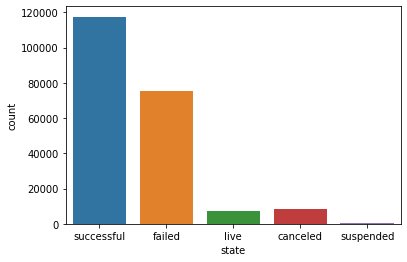

In [17]:
sns.countplot(data=df_eda, x="state");

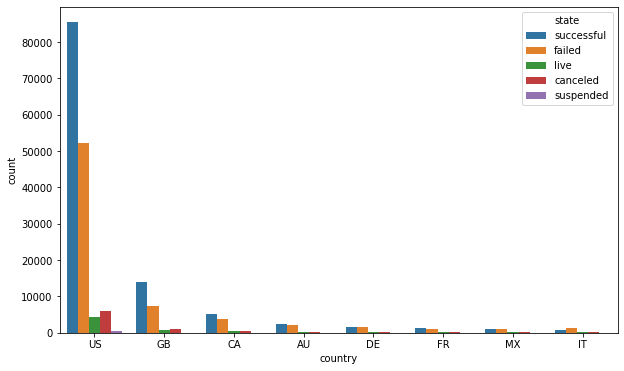

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x="country", hue='state', order = df_eda['country'].value_counts().iloc[:8].index);
plt.show();

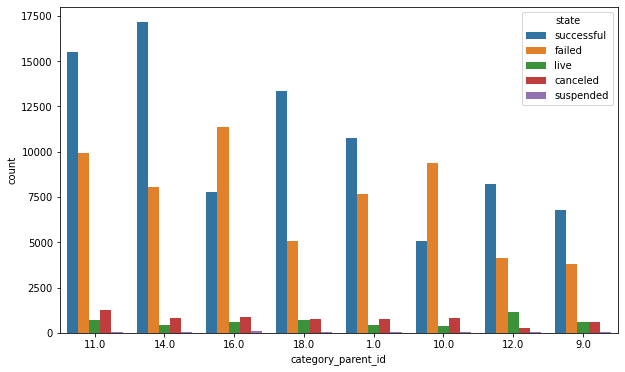

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x="category_parent_id", hue='state', order = df_eda['category_parent_id'].value_counts().iloc[:8].index);
plt.show();

In [22]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 50000, 100000, np.inf]
df_eda['binned_goal'] = pd.cut(df_eda['goal_usd'], bins=bins)

<ipython-input-22-69af653493be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['binned_goal'] = pd.cut(df_eda['goal_usd'], bins=bins)


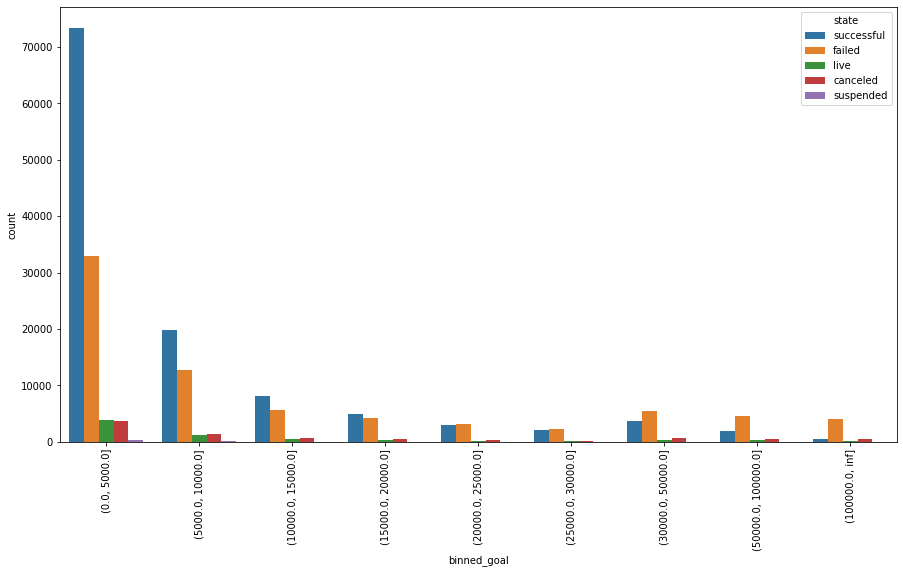

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_eda, x='binned_goal', hue='state');
plt.xticks(rotation=90);

In [24]:
bins2 = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000, np.inf]
df_eda['binned_goal2'] = pd.cut(df_eda['goal_usd'], bins=bins)

<ipython-input-24-e9c352b33fca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['binned_goal2'] = pd.cut(df_eda['goal_usd'], bins=bins)


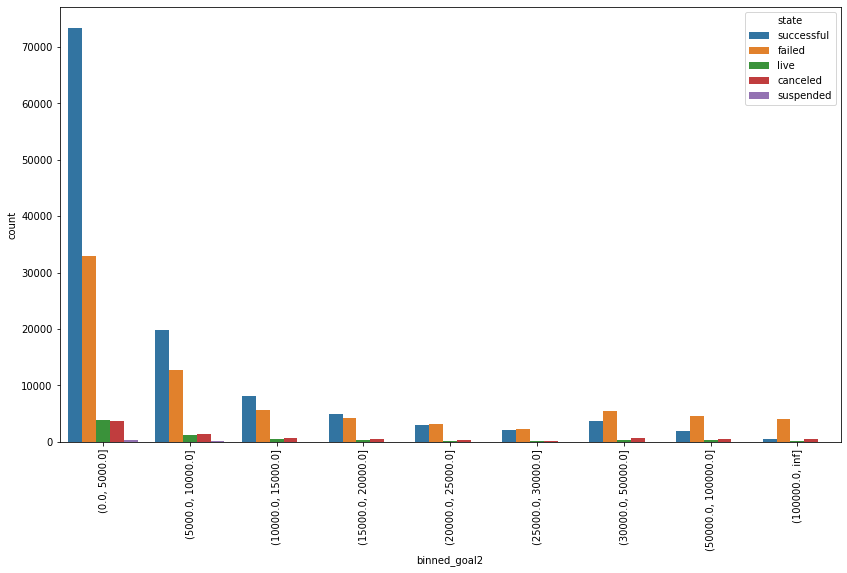

In [25]:
plt.figure(figsize=(14,8))
sns.countplot(data=df_eda, x='binned_goal2', hue='state');
plt.xticks(rotation=90);

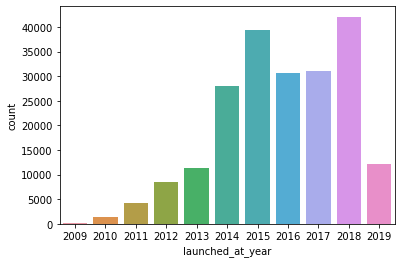

In [26]:
sns.countplot(data=df_eda, x="launched_at_year");

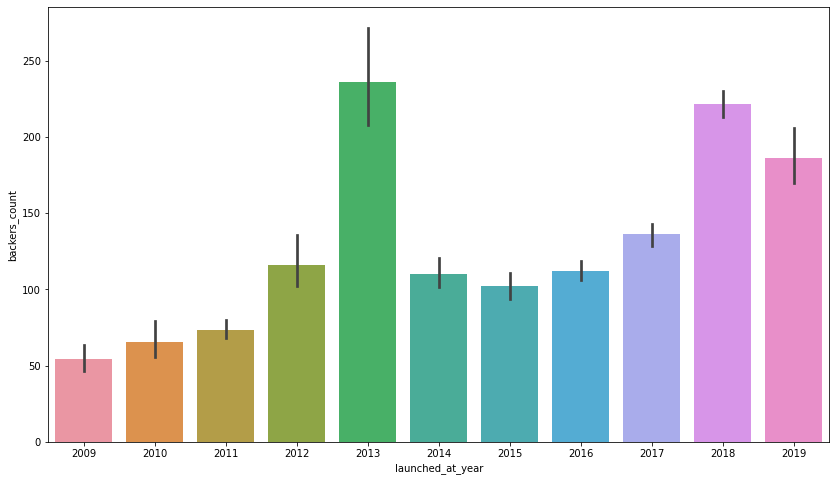

In [27]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_eda, x="launched_at_year", y= 'backers_count');

In [28]:
df_year = df_eda.groupby('launched_at_year')
df_year.backers_count.describe()

,count,mean,std,min,25%,50%,75%,max
launched_at_year,,,,,,,,
2009,234.0,54.311966,65.558814,0.0,14.0,35.0,61.75,419.0
2010,1418.0,65.509873,230.870585,0.0,13.0,35.0,67.00,6479.0
2011,4234.0,73.555503,194.163096,0.0,15.0,36.0,72.00,5661.0
2012,8611.0,115.976309,794.316670,0.0,16.0,43.0,92.00,63416.0
2013,11325.0,235.918411,1707.632394,0.0,19.0,53.0,119.00,91585.0
2014,28121.0,110.159881,836.539087,0.0,2.0,19.0,72.00,105857.0
2015,39376.0,101.947633,917.974390,0.0,1.0,11.0,56.00,73206.0
2016,30584.0,111.795612,552.836434,0.0,2.0,18.0,73.00,35550.0
2017,31052.0,135.977361,674.045270,0.0,3.0,23.0,86.00,26828.0


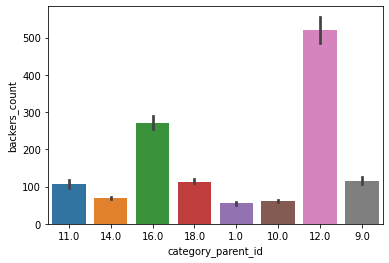

In [29]:
sns.barplot(data=df_eda, x = df_eda.category_parent_id, y= 'backers_count', order = df_eda['category_parent_id'].value_counts('backers_count').iloc[:8].index);

In [ ]:
df_country = df_eda.groupby('country').mean()
df_country.head()

In [ ]:
df_category = df_eda.groupby('category_parent_id').mean()
df_category.head(5)

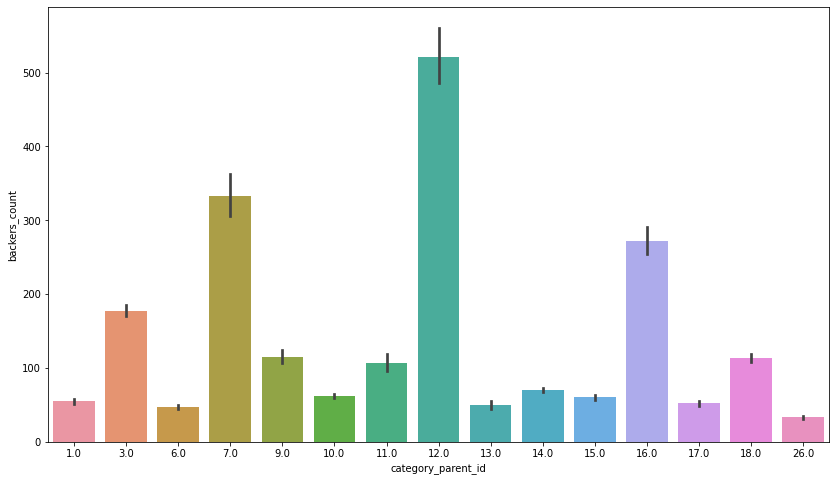

In [30]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_eda, x= df_eda.category_parent_id, y=df_eda.backers_count); 

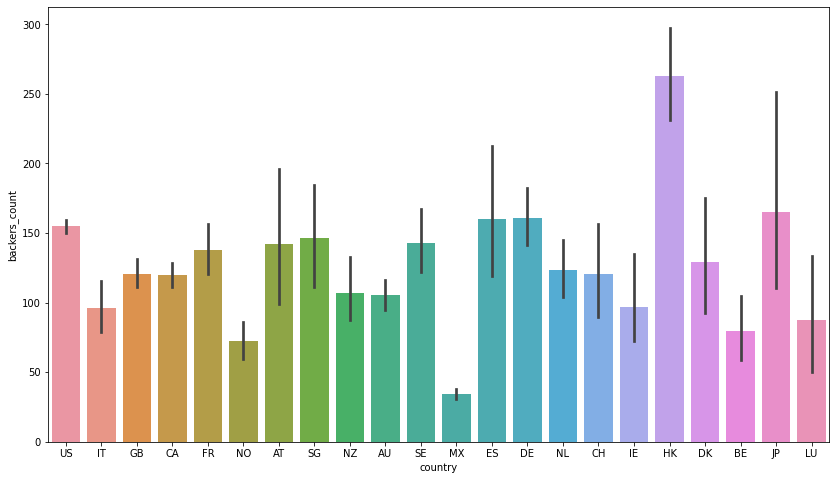

In [31]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_eda, x= df_eda.country, y=df_eda.backers_count); 

Text(0, 0.5, 'Y Label')

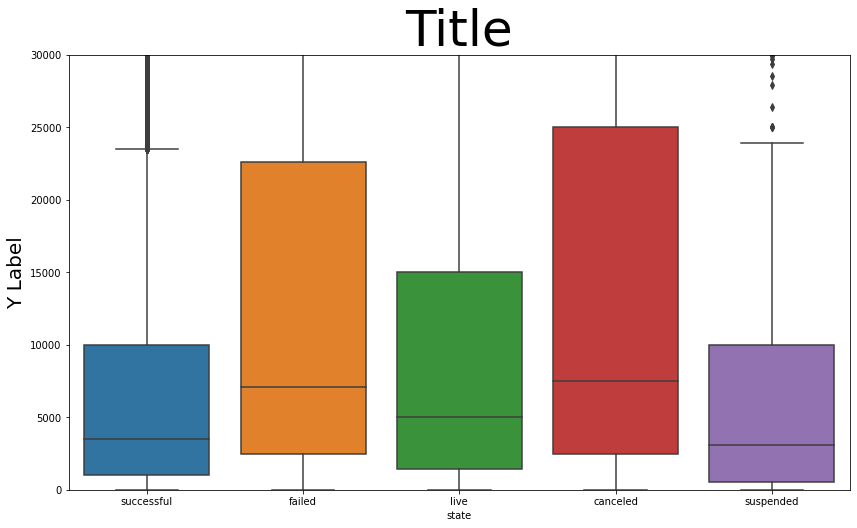

In [32]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="state", y="goal_usd", data=df_eda)
ax.set(ylim=(0, 30000))
ax.tick_params(labelsize=10)
ax.set_title("Title",fontsize=50)
ax.set_ylabel("Y Label",fontsize=20)